In [5]:
import numpy as np
from matplotlib import pyplot as plt
import scipy as sp
import scipy.sparse
import scipy.sparse.linalg as sla

## Task 2

In [ ]:
n = 10
ex = np.ones(n)
A = sp.sparse.spdiags(np.vstack((-ex, 2 * ex, -ex)), [-1, 0, 1], n, n, 'csr')
rhs = np.random.normal(size=n)

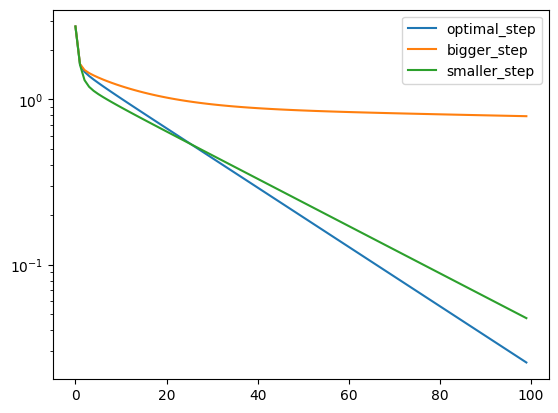

In [18]:
# richardson iteration
lam_max = sla.eigsh(A, k=1, which='LA', return_eigenvectors=False)
lam_min = sla.eigsh(A, k=1, which='SA', return_eigenvectors=False)
tau = 2.0 / (lam_max + lam_min)

def richardson(steps, tau):
    x = np.zeros(n)
    res = []
    for i in range(steps):
        r = A.dot(x) - rhs
        x = x - tau * r
        res.append(np.linalg.norm(r))
    return res

plt.plot(richardson(100, tau), label = 'optimal_step')
plt.plot(richardson(100, tau * 1.02), label = 'bigger_step')
plt.plot(richardson(100, tau * 0.8), label = 'smaller_step')
plt.yscale('log')
plt.legend()

## Task 3

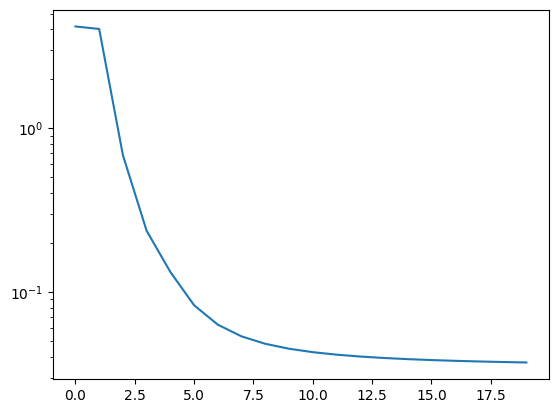

In [49]:
def CG(A, rhs, x, steps):
    res = []
    r = A.dot(x) - rhs
    d = r.copy()
    d_array = [d]
    for i in range(steps):
        alpha = r.dot(r) / d.dot(A @ d)
        x = x - alpha * r
        r_next = A.dot(x) - rhs
        beta = r_next.dot(r_next) / r.dot(r)
        d = r_next + beta * d
        d_array.append(d)
        res = np.append(res, np.linalg.norm(r_next))
        r = r_next
    return res, d_array


A = np.array([[3, 2], [2, 6]])
rhs = np.array([2, -8])
x0 = np.array([0, 0])
N = 20
res, d_array = CG(A, rhs, x0, 20)

plt.plot(res)
plt.yscale('log')

In [50]:
D = np.zeros((N, N))
for i in range(N):
    for j in range(N):
        D[i,j] = d_array[i].T @ A.dot(d_array[j])

D

array([[ 3.32000000e+02, -7.10542736e-15,  1.81811481e+02,
         9.79923489e+00,  7.26092144e+00,  1.69879167e+00,
         1.91145087e+00,  1.84698353e+00,  1.93299796e+00,
         2.10608222e+00,  2.33100320e+00,  2.58872394e+00,
         2.86846279e+00,  3.16373614e+00,  3.47042643e+00,
         3.78579353e+00,  4.10794027e+00,  4.43550833e+00,
         4.76749698e+00,  5.10315065e+00],
       [-7.10542736e-15,  4.99286902e+01,  2.47865002e+01,
         7.37689810e+00,  2.21451689e+00,  2.17073586e+00,
         1.53661570e+00,  1.45126386e+00,  1.52495341e+00,
         1.67240724e+00,  1.86176634e+00,  2.07738338e+00,
         2.31063536e+00,  2.55637358e+00,  2.81132846e+00,
         3.07331858e+00,  3.34082830e+00,  3.61276836e+00,
         3.88833331e+00,  4.16691287e+00],
       [ 1.81811481e+02,  2.47865002e+01,  1.11869463e+02,
         9.02847815e+00,  5.07563208e+00,  2.00793651e+00,
         1.80959264e+00,  1.73191681e+00,  1.81560275e+00,
         1.98358970e+00,  2.2

## Task 4